In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [6]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [14]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [15]:
X = df.drop("species",axis=1)
y = df.species

In [17]:
Xtrain , Xtest , ytrain , ytest = train_test_split(X , y , test_size = 0.2 , random_state = 42 , stratify = y)

In [25]:
len(Xtrain)

266

In [22]:
len(Xtest)

67

In [27]:
num_features = X.select_dtypes(include=["int64","float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),num_features),
        ("cat",OneHotEncoder(),cat_features)
    ]
)

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",LogisticRegression(max_iter=1000))
])

log_reg.fit(Xtrain, ytrain)

y_pred_lr = log_reg.predict(Xtest)
print("Accuracy of Logistic Regression :",accuracy_score(ytest,y_pred_lr))

Accuracy of Logistic Regression : 0.9850746268656716


In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",DecisionTreeClassifier(random_state=42))
])
dt.fit(Xtrain,ytrain)

y_pred_dt = dt.predict(Xtest)
print("Accuracy of Decison Tree Classifier :",accuracy_score(ytest,y_pred_dt))

Accuracy of Decison Tree Classifier : 0.9253731343283582


In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",RandomForestClassifier(random_state=42))
])
rf.fit(Xtrain,ytrain)

y_pred_rf = rf.predict(Xtest)
print("Accuracy of Random Forest Classifier :",accuracy_score(ytest,y_pred_rf))

Accuracy of Random Forest Classifier : 1.0


In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gb = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",GradientBoostingClassifier())
])

gb.fit(Xtrain , ytrain)

y_pred_gb = gb.predict(Xtest)
print("Accuracy of Gradient Boosting Classifier :",accuracy_score(ytest,y_pred_gb))

Accuracy of Gradient Boosting Classifier : 0.9701492537313433


In [38]:
from sklearn.svm import SVC
svm = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",SVC())
])
svm.fit(Xtrain,ytrain)

y_pred_svm = svm.predict(Xtest)
print("Accuracy of Support Vector Machine Classifier :",accuracy_score(ytest,y_pred_svm))

Accuracy of Support Vector Machine Classifier : 1.0


In [49]:
rf_grid = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",RandomForestClassifier(random_state=42))
])

In [50]:
param_grid = {
    "model__n_estimators":[100,200],
    "model__max_depth":[None,5,10],
    "model__min_samples_split":[2,5]
}

In [51]:
grid_search = GridSearchCV(
    rf_grid,
    param_grid,
    cv=5,
    scoring = "accuracy",
    n_jobs = -1
)

In [52]:
grid_search.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         Index(['island', 'sex'], dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 5, 10],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='accuracy')

In [53]:
print("Best Params:", grid_search.best_params_)

Best Params: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}


In [56]:
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(Xtest)

print("Final Accuracy:", accuracy_score(ytest, y_pred_best))
print(classification_report(ytest, y_pred_best))


Final Accuracy: 1.0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



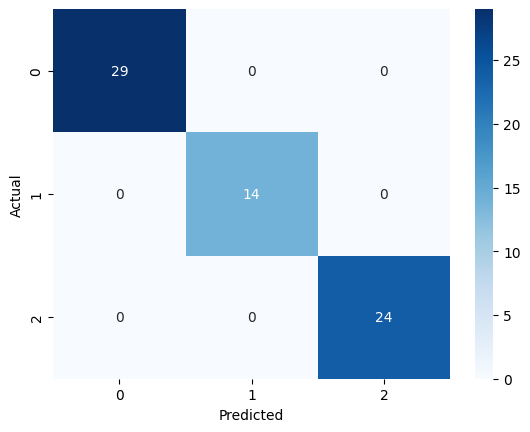

In [61]:
cm = confusion_matrix(ytest,y_pred_best)

sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
